Loading data from Spark output folder: s3://processed-data/bahrain_Q_telemetry_processed.parquet...


/opt/conda/lib/python3.11/site-packages/fsspec/registry.py:271: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)



Processed data loaded successfully:
  Driver   Distance       Speed  Throttle  Brake
0    LEC   0.000000  291.196428      99.0  False
1    LEC   2.024058  291.464287      99.0  False
2    LEC   6.079613  292.000000      99.0  False
3    LEC  18.285342  292.937501      99.0  False
4    LEC  19.099231  293.000000      99.0  False

Generating plot...


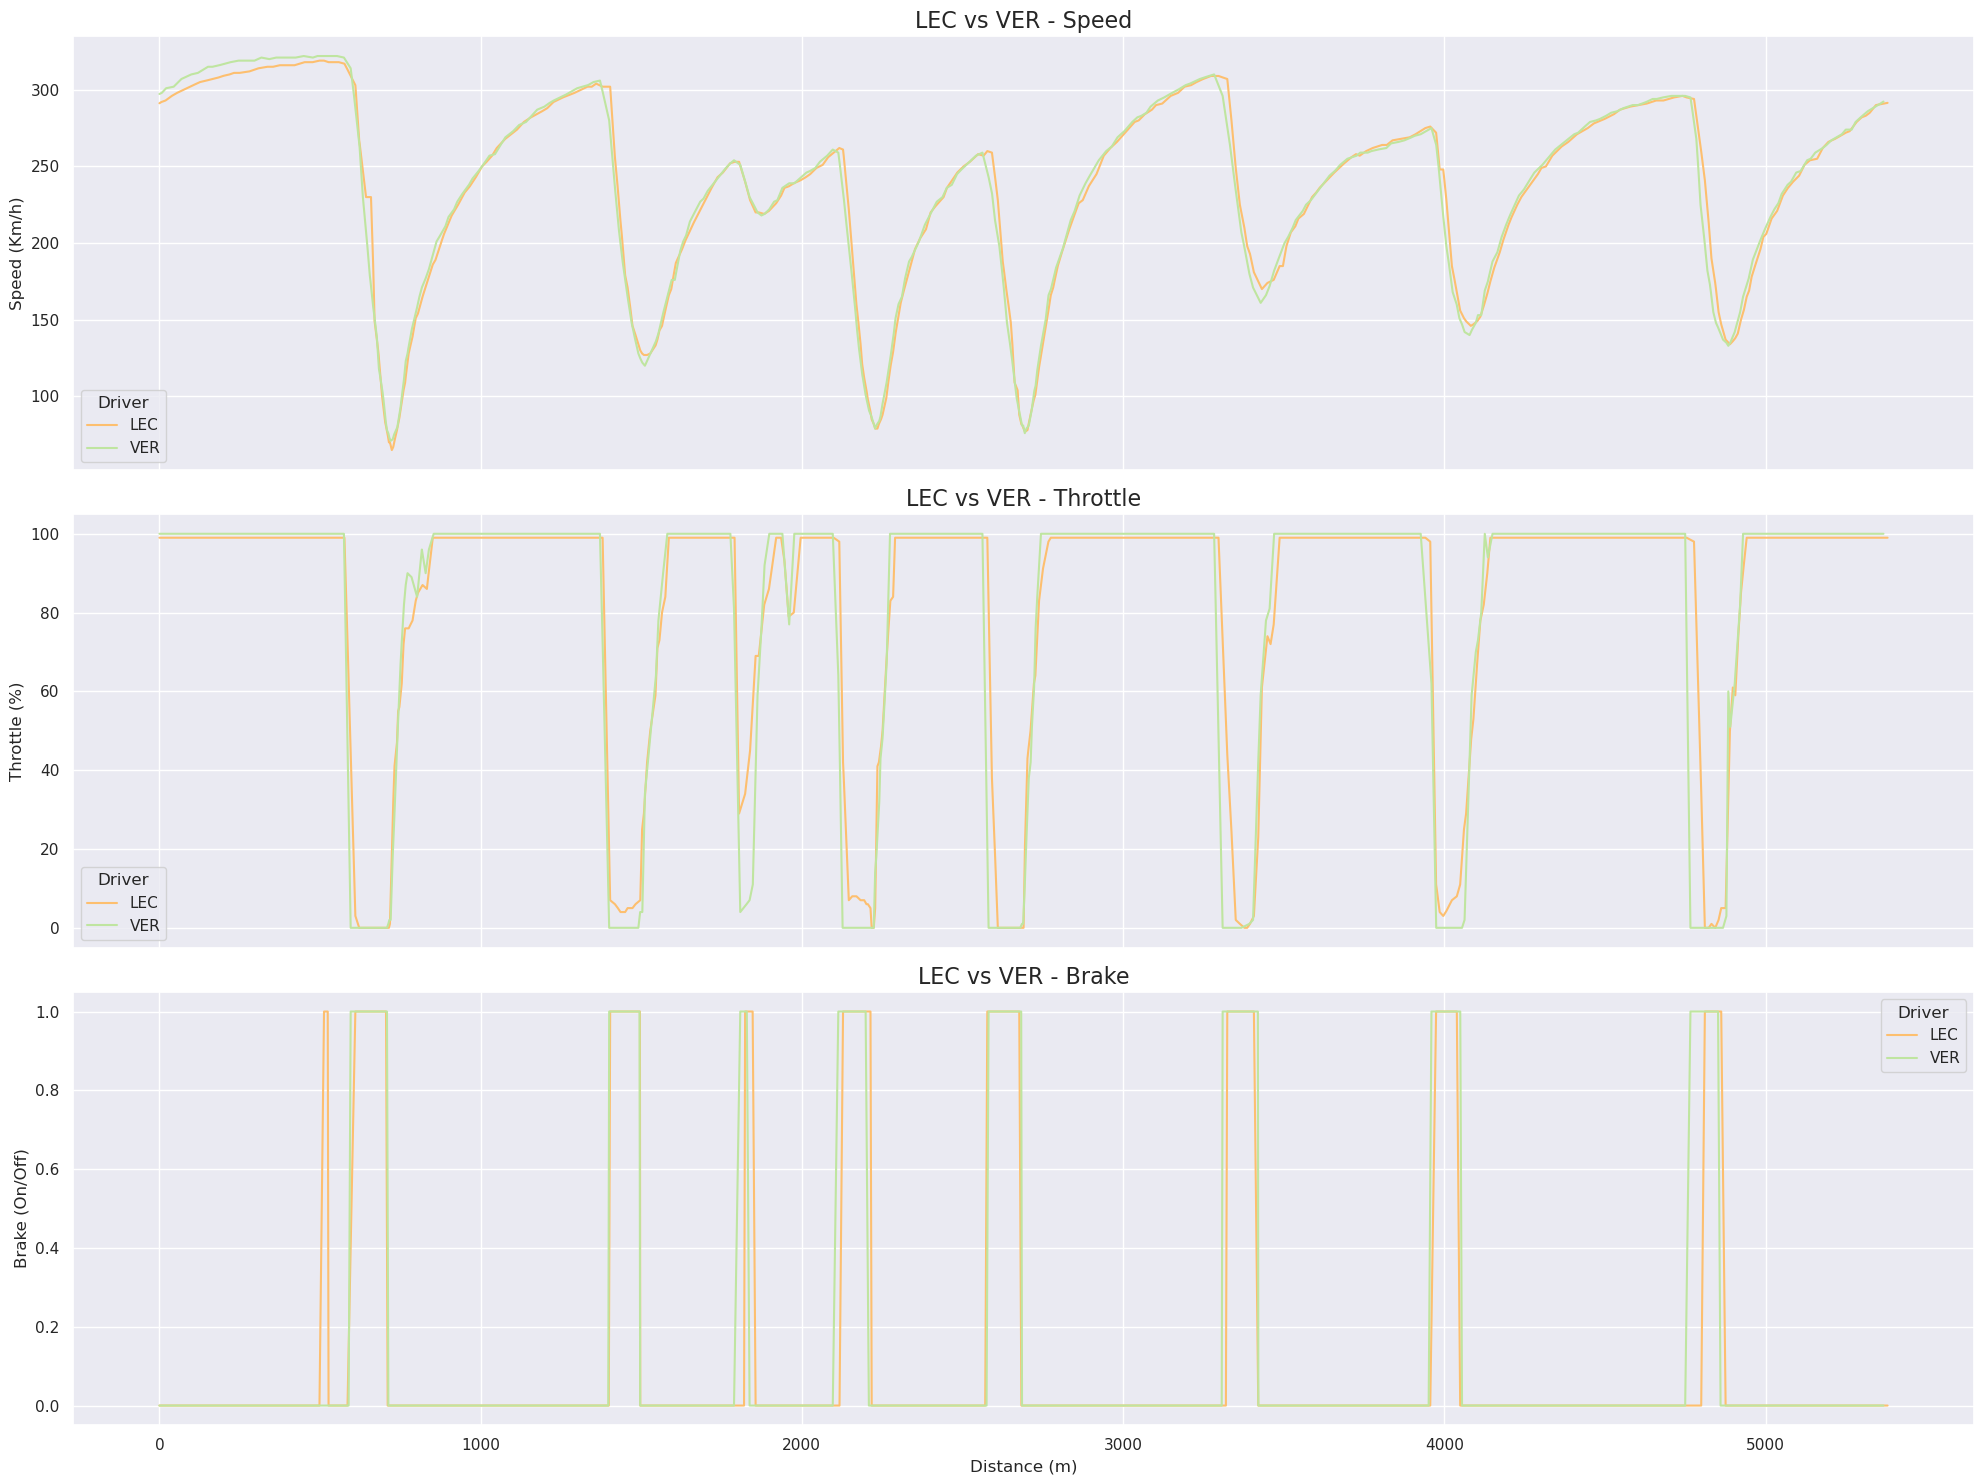

In [1]:
# Notebook: 06_Telemetry_Viz.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Configure S3 (MinIO) Connection ---
storage_options = {
    "key": "minioadmin",
    "secret": "minioadmin",
    "client_kwargs": {"endpoint_url": "http://minio:9000"}
}

# --- 2. Read Processed Data from Spark Folder ---
folder_path = 's3://processed-data/bahrain_Q_telemetry_processed.parquet'

try:
    print(f"Loading data from Spark output folder: {folder_path}...")
    df = pd.read_parquet(
        folder_path,
        storage_options=storage_options
    )
    print("\nProcessed data loaded successfully:")
    print(df.head())

except Exception as e:
    print(f"Error: {e}")

# --- 3. Plot the Telemetry Comparison ---
print("\nGenerating plot...")
sns.set_theme(style="darkgrid")

# Create a figure with 3 subplots, sharing the X-axis
fig, axes = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

# Get the two drivers
drivers = df['Driver'].unique()
if len(drivers) < 2:
    print("Error: Need two drivers to compare.")
else:
    # Plot Speed
    sns.lineplot(data=df, x="Distance", y="Speed", hue="Driver", ax=axes[0], palette="Spectral")
    axes[0].set_title(f"{drivers[0]} vs {drivers[1]} - Speed", fontsize=16)
    axes[0].set_ylabel("Speed (Km/h)")

    # Plot Throttle
    sns.lineplot(data=df, x="Distance", y="Throttle", hue="Driver", ax=axes[1], palette="Spectral")
    axes[1].set_title(f"{drivers[0]} vs {drivers[1]} - Throttle", fontsize=16)
    axes[1].set_ylabel("Throttle (%)")

    # Plot Brake
    sns.lineplot(data=df, x="Distance", y="Brake", hue="Driver", ax=axes[2], palette="Spectral")
    axes[2].set_title(f"{drivers[0]} vs {drivers[1]} - Brake", fontsize=16)
    axes[2].set_ylabel("Brake (On/Off)")
    axes[2].set_xlabel("Distance (m)")

    plt.tight_layout()
    plt.show()